In [1]:
import os
import mne
import numpy as np

In [2]:
print('MNE–Python version', mne.__version__)

MNE–Python version 1.7.1


# Test on single participant, single task, single run

### define inputs

In [5]:
sub_label = '02'
task_label = 'motor'
run_label = '1'

In [6]:
#data_dir = os.path.join('/Users/dsj3886/Library/CloudStorage/',
#                        'OneDrive-NorthwesternUniversity/',
#                        'Documents - SoundBrain Lab/Lab Research Projects/',
#                        'Experiments/',
#                        'NU_Experiments/EAM1/EEG_raw')
data_dir = os.path.join('/Users/dsj3886/Downloads',
                        #os.path.curdir, 
                        'EEG_raw')

bdf_path = os.path.join(data_dir,
                        f'sub-{sub_label}_task-{task_label}_run-{run_label}.bdf')
print(bdf_path)
#out_dir = []


/Users/dsj3886/Downloads/EEG_raw/sub-02_task-motor_run-1.bdf


### load EEG data

In [7]:
data = mne.io.read_raw_bdf(bdf_path, preload=True)

Extracting EDF parameters from /Users/dsj3886/Downloads/EEG_raw/sub-02_task-motor_run-1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19726335  =      0.000 ...  1204.000 secs...


In [8]:
print(data.info)

<Info | 8 non-empty values
 bads: []
 ch_names: M1, M2, Cz, Erg1, Status
 chs: 4 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 3334.0 Hz
 meas_date: 2024-07-18 13:12:19 UTC
 nchan: 5
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


Using matplotlib as 2D backend.


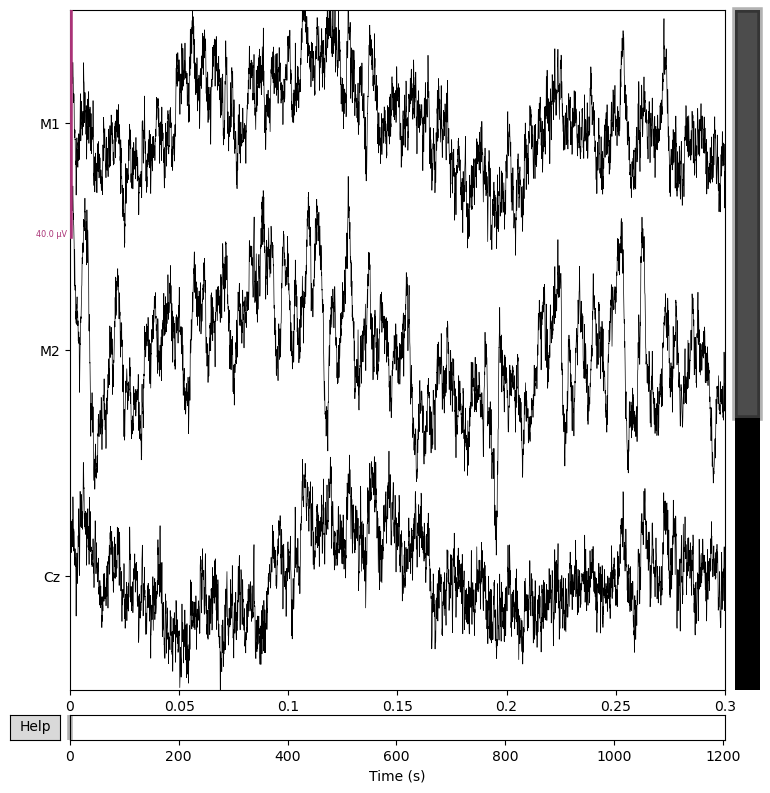

In [9]:
data.plot(duration=0.3, 
          n_channels=3,
          remove_dc=True);

### set reference channels

In [10]:
data_ref = data.set_eeg_reference(ref_channels=['M1', 'M2'])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


In [11]:
print(data_ref.info)

<Info | 9 non-empty values
 bads: []
 ch_names: M1, M2, Cz, Erg1, Status
 chs: 4 EEG, 1 Stimulus
 custom_ref_applied: True
 highpass: 0.0 Hz
 lowpass: 3334.0 Hz
 meas_date: 2024-07-18 13:12:19 UTC
 nchan: 5
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


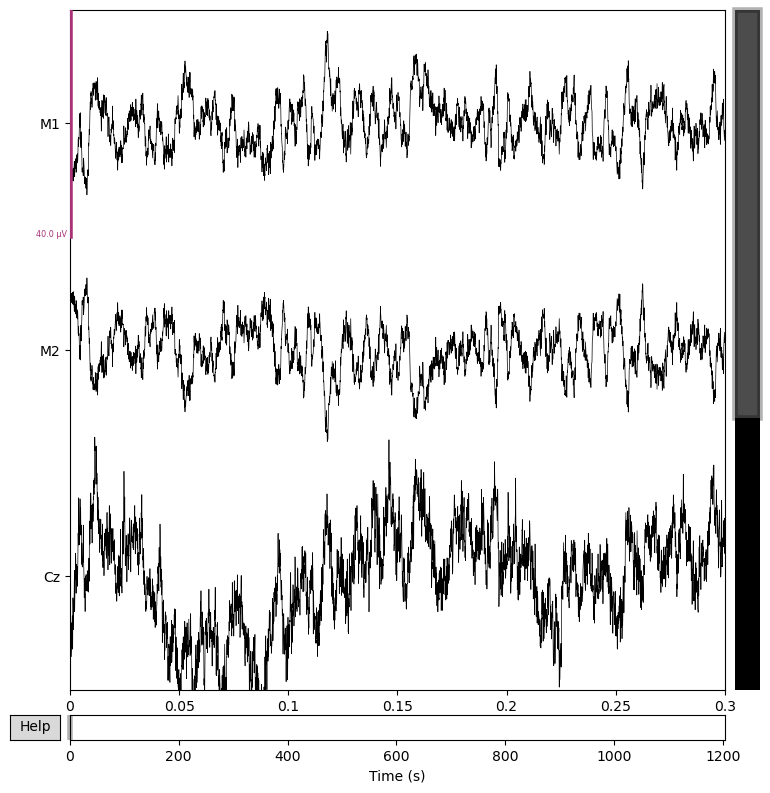

In [12]:
data_ref.plot(duration=0.3, 
              n_channels=3, 
              remove_dc=True);

### filter data

In [13]:
data_filtered = data_ref.copy().filter(l_freq = 70, h_freq = 2000)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3091 samples (0.189 s)



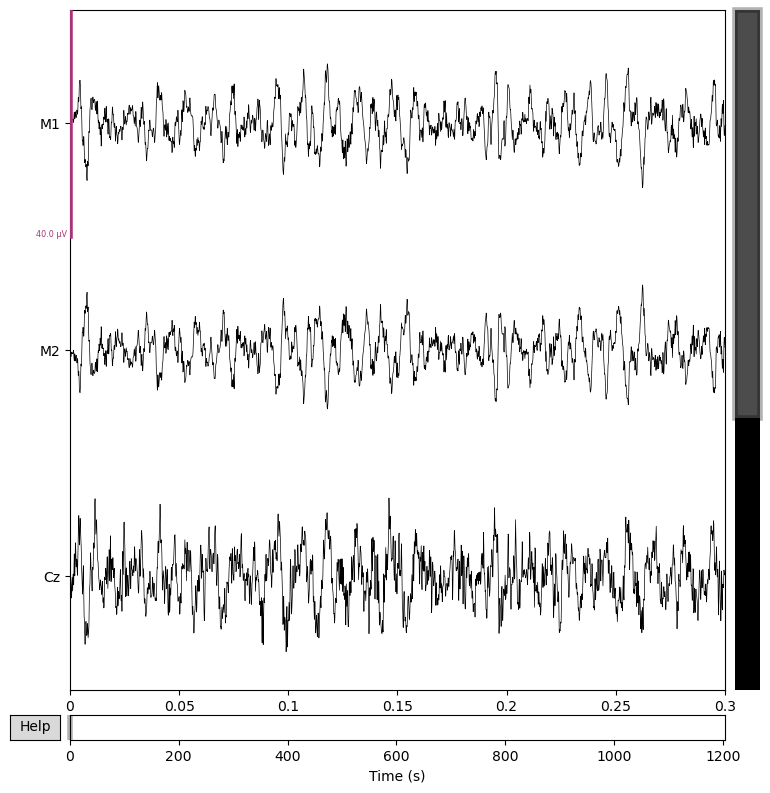

In [14]:
data_filtered.plot(duration=0.3, 
                   n_channels=3, 
                   remove_dc=True);

### Find events in the trigger channel

In [15]:
events = mne.find_events(data_filtered, 
                         stim_channel='Status', 
                         initial_event=True)

3640 events found on stim channel Status
Event IDs: [ 2048  2049  2303  6144  6145  6149  6277 10240 10241 10246 14337 14341
 14342 18432 18433 18439 34816 34817 34824 67584]


In [16]:
# unique_events, unique_indices, unique_inverse, count_events = 
unique, counts = np.unique(events[:,2], return_counts=True)
print(unique)
print(counts)


[ 2048  2049  2303  6144  6145  6149  6277 10240 10241 10246 14337 14341
 14342 18432 18433 18439 34816 34817 34824 67584]
[   7   11    1 1170 1131 1139    1   28   25   27    2    1    1   24
   23   23    8    8    9    1]


In [30]:
event_dict = {#'pol_positive': 2049,
              #'pol_negative': 2050,
              'button_1': 6144,
              #'button_2': 6145,
              #'button_3': 6149,
              }

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_16957/2210850885.py:1: RuntimeWarning: event 2049 missing from event_id will be ignored
  fig = mne.viz.plot_events(
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_16957/2210850885.py:1: RuntimeWarning: event 2303 missing from event_id will be ignored
  fig = mne.viz.plot_events(
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_16957/2210850885.py:1: RuntimeWarning: event 6145 missing from event_id will be ignored
  fig = mne.viz.plot_events(
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_16957/2210850885.py:1: RuntimeWarning: event 6149 missing from event_id will be ignored
  fig = mne.viz.plot_events(
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_16957/2210850885.py:1: RuntimeWarning: event 67584 missing from event_id will be ignored
  fig = mne.viz.plot_events(


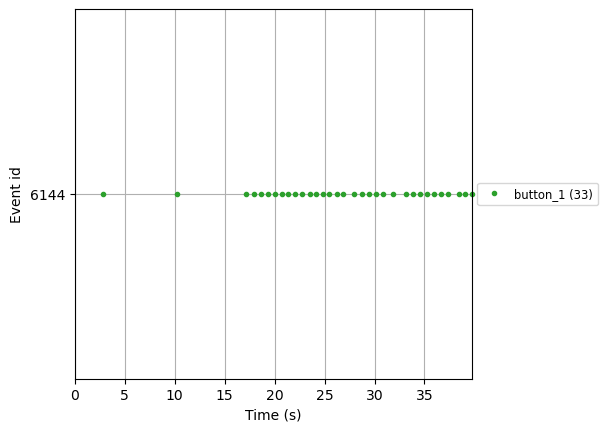

In [31]:
fig = mne.viz.plot_events(
            events[:100], event_id=event_dict, 
            sfreq=data_filtered.info["sfreq"], 
            first_samp=data_filtered.first_samp
)

### Epoch the data based on events

In [32]:
epochs = mne.Epochs(data_filtered, 
                    events, 
                    event_id=event_dict,
                    picks=['Cz'],
                    tmin=-0.04, tmax=0.3, 
                    baseline=[-0.04, 0],
                    #reject = dict(eeg = 35e-6)).drop_bad()
                    reject=dict(eeg=75e-6)).drop_bad()


Not setting metadata


1170 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1170 events and 5571 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
16 bad epochs dropped


In [33]:
epochs.drop_log[:10]

(('IGNORED',),
 (),
 ('IGNORED',),
 ('IGNORED',),
 (),
 ('IGNORED',),
 ('IGNORED',),
 (),
 ('IGNORED',),
 ('IGNORED',))

In [34]:
print(epochs.info)

<Info | 9 non-empty values
 bads: []
 ch_names: Cz
 chs: 1 EEG
 custom_ref_applied: True
 highpass: 70.0 Hz
 lowpass: 2000.0 Hz
 meas_date: 2024-07-18 13:12:19 UTC
 nchan: 1
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


You seem to have overlapping epochs. Some event lines may be duplicated in the plot.
Using data from preloaded Raw for 5 events and 5571 original time points ...


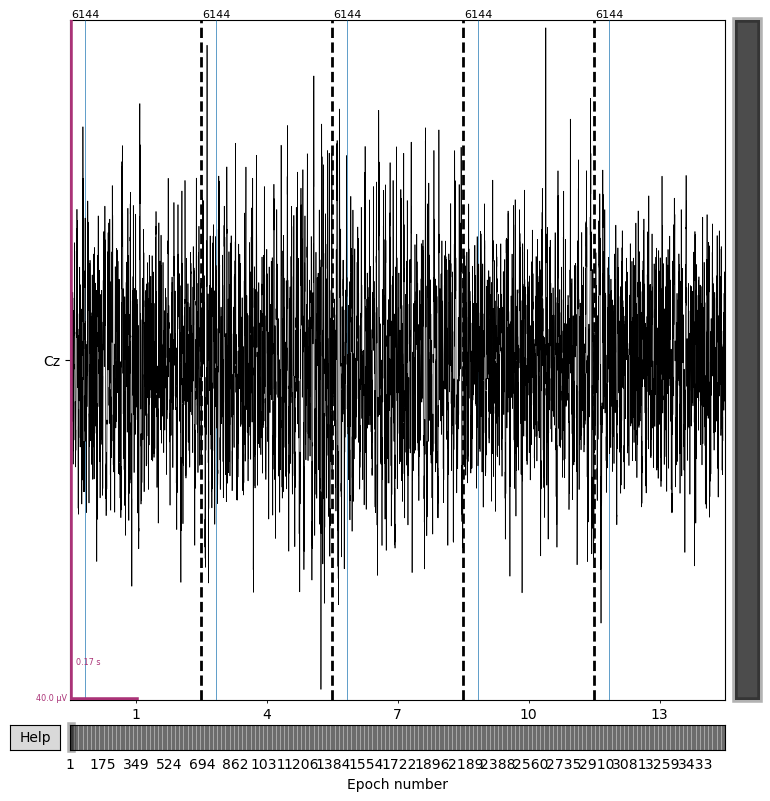

In [36]:
epochs.plot(n_epochs = 5, # len(epochs), 
            events = True);

In [37]:
# save epoched data to a new file
epochs.save(f'sub-{sub_label}_task-{task_label}_run-{run_label}_epochs.fif', overwrite = True)

Using data from preloaded Raw for 1 events and 5571 original time points ...
Using data from preloaded Raw for 1154 events and 5571 original time points ...


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_16957/1753865263.py:2: RuntimeWarning: This filename (sub-02_task-motor_run-1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'sub-{sub_label}_task-{task_label}_run-{run_label}_epochs.fif', overwrite = True)


### Created `Evoked` from `Epochs`

In [38]:
evoked = epochs.average()

In [39]:
evoked

Condition,button_1
Data kind,average
Timepoints,5571 samples
Channels,1 channels
Number of averaged epochs,1154
Time range (secs),-0.03997802734375 – 0.29998779296875
Baseline (secs),-0.040 – 0.000 s


In [40]:
print(f"Epochs baseline: {epochs.baseline}")
print(f"Evoked baseline: {evoked.baseline}")

Epochs baseline: (-0.04, 0.0)
Evoked baseline: (-0.04, 0.0)


Need more than one channel to make topography for eeg. Disabling interactivity.


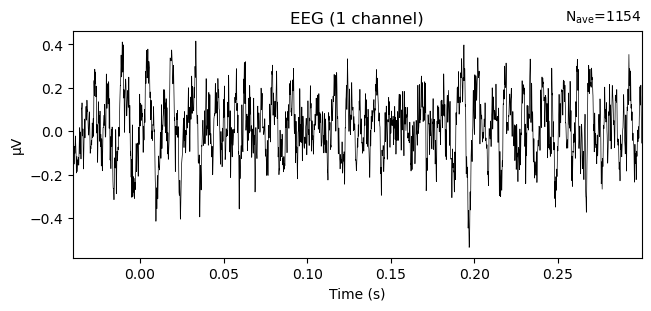

In [41]:
evoked.plot();

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_16957/2912148068.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  evoked_psd.plot()
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_16957/2912148068.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_psd.plot()
/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


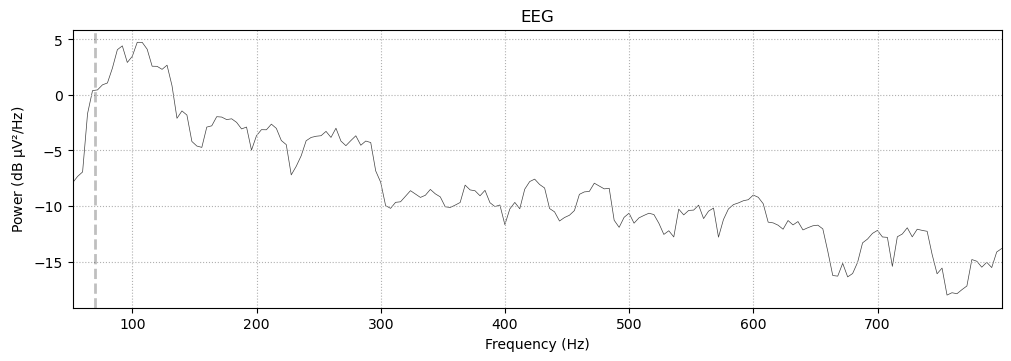

In [42]:
evoked_psd = evoked.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
evoked_psd.plot()

No baseline correction applied


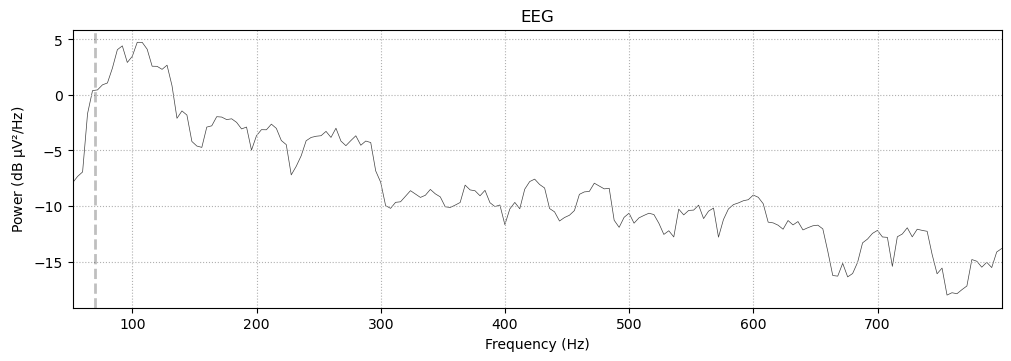

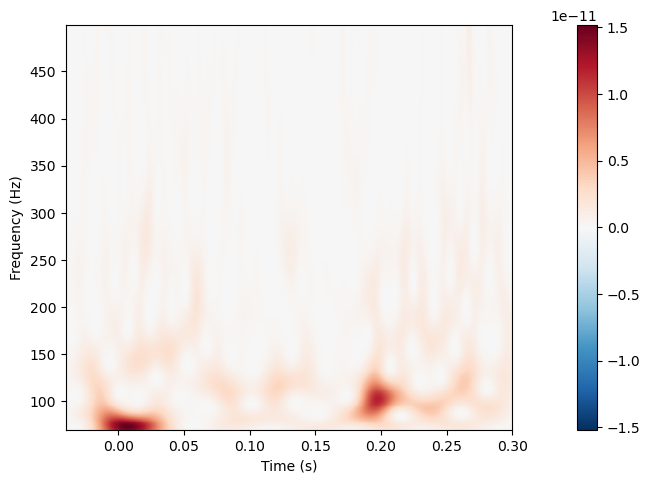

In [43]:
frequencies = np.arange(70,500)
power = evoked.compute_tfr("morlet", freqs=frequencies)
power.plot();

# Combine multiple runs

In [44]:
sub_label = '02'
task_list = ['active', 'passive', 'motor']
run_labels = ['1','2']

#data_dir = os.path.join('/Users/dsj3886/Library/CloudStorage/',
#                        'OneDrive-NorthwesternUniversity/',
#                        'Documents - SoundBrain Lab/Lab Research Projects/',
#                        'Experiments/',
#                        'NU_Experiments/EAM1/EEG_raw')
data_dir = os.path.join('/Users/dsj3886/Downloads',
                        #os.path.curdir, 
                        'EEG_raw')

#out_dir = []

In [45]:
# initialize an empty dictionary for data
task_evoked_dict = {}
for task_label in task_list:
    print(f'Loading {task_label} data')
    epoch_list = []

    if task_label == 'motor':
        event_dict = {'button_press': 6144}
    else:
        event_dict = {'pol_positive': 2049,
                      'pol_negative': 2050}
    for run_label in run_labels:
        try:
            print(f'Loading run {run_label}')
            # define one EEG data file path
            bdf_path = os.path.join(data_dir, f'sub-{sub_label}_task-{task_label}_run-{run_label}.bdf')
            
            # load in EEG data
            data = mne.io.read_raw_bdf(bdf_path, preload=True)
            
            # re-reference data to linked mastoid reference
            data_ref = data.set_eeg_reference(ref_channels=['M1', 'M2'])
            
            # filter data
            data_filtered = data_ref.copy().filter(l_freq = 70, h_freq = 2000)
            
            # find events
            events = mne.find_events(data_filtered, 
                                stim_channel='Status', 
                                initial_event=True)
            
            # epoch data based on stimulus events
            epochs = mne.Epochs(data_filtered, 
                            events, 
                            event_id=event_dict,
                            picks=['Cz'],
                            tmin=-0.04, tmax=0.3, 
                            baseline=[-0.04, 0],
                            #reject = dict(eeg = 35e-6)).drop_bad()
                            reject=dict(eeg=75e-6)).drop_bad()
            
            epoch_list.append(epochs)
        except:
            print(f"No run {run_label} for task-{task_label}")
    
    # combine epochs across runs
    all_epochs = mne.concatenate_epochs(epoch_list)
    epochs.save(f'sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite=True)
    
    # create evoked average from across-run epochs
    all_evoked = all_epochs.average()

    # add to results dict
    task_evoked_dict[task_label] = all_evoked

Loading active data
Loading run 1
Extracting EDF parameters from /Users/dsj3886/Downloads/EEG_raw/sub-02_task-active_run-1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16826367  =      0.000 ...  1027.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3091 samples (0.189 s)

4946 events found on stim channel Status
Event IDs: [ 2048  2049  2050 

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_16957/3870401631.py:48: RuntimeWarning: This filename (sub-02_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3091 samples (0.189 s)

1202 events found on stim channel Status
Event IDs: [ 2049  2050  2177  2303 67584]
Not setting metadata
1197 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1197 events and 5571 original time points ...
    Rejecting  e

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_16957/3870401631.py:48: RuntimeWarning: This filename (sub-02_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite=True)


Reading 0 ... 19726335  =      0.000 ...  1204.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3091 samples (0.189 s)

3640 events found on stim channel Status
Event IDs: [ 2048  2049  2303  6144  6145  6149  6277 10240 10241 10246 14337 14341
 14342 18432 18433 18439 34816 34817 34824 67584]
Not setting metadata
1170 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_16957/3870401631.py:48: RuntimeWarning: This filename (sub-02_task-motor_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite=True)


In [46]:
task_evoked_dict

{'active': <Evoked | '1.00 × pol_positive + 0.00 × pol_negative' (average, N=2200), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
 'passive': <Evoked | '0.50 × pol_positive + 0.50 × pol_negative' (average, N=2378), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
 'motor': <Evoked | 'button_press' (average, N=1154), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>}

Need more than one channel to make topography for eeg. Disabling interactivity.


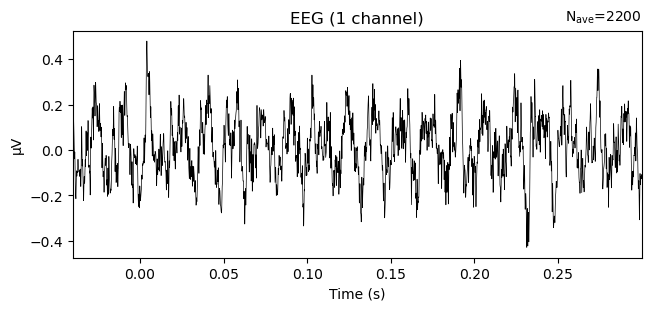

In [166]:
task_evoked_dict['active'].plot();

Need more than one channel to make topography for eeg. Disabling interactivity.


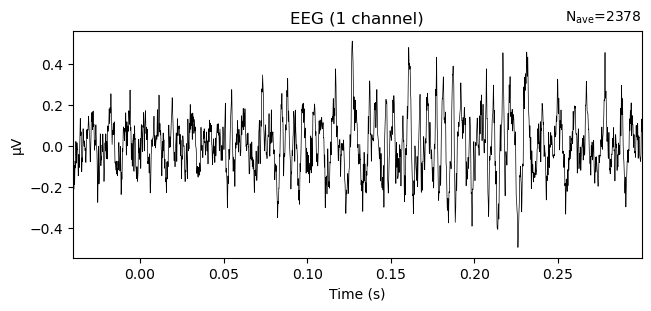

In [167]:
task_evoked_dict['passive'].plot();

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/2818158752.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  evoked_psd.plot()
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/2818158752.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_psd.plot()
/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


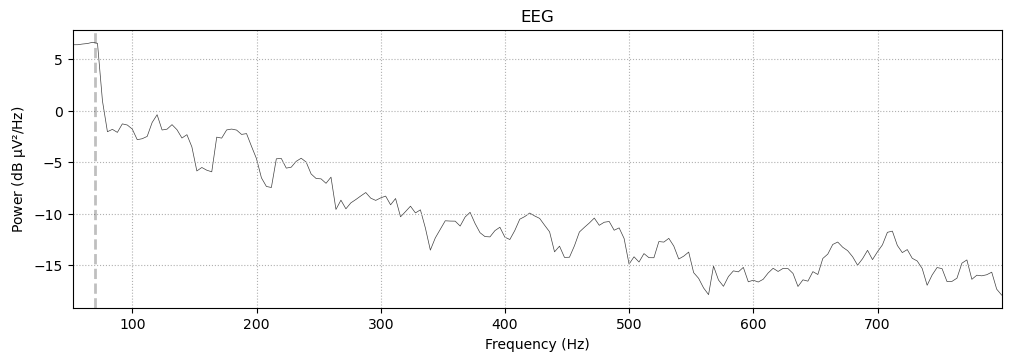

In [168]:
evoked_psd = task_evoked_dict['active'].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
evoked_psd.plot()

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/2031050259.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  evoked_psd.plot()
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/2031050259.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_psd.plot()
/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


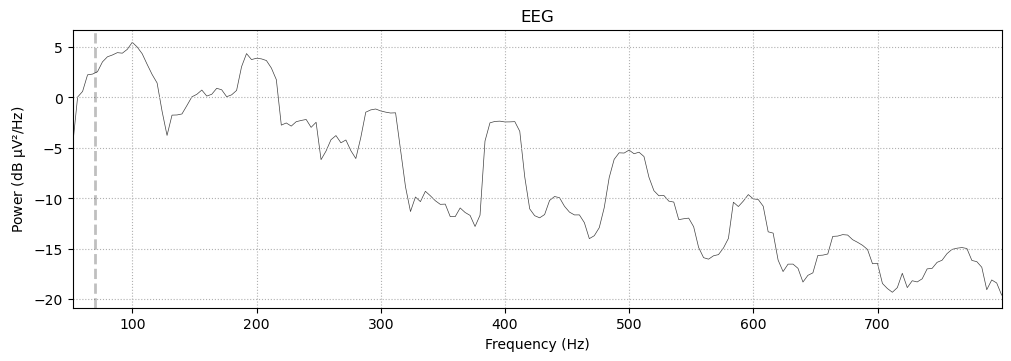

In [169]:
evoked_psd = task_evoked_dict['passive'].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
evoked_psd.plot()

In [170]:
passive_psd = task_evoked_dict['passive'].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
active_psd = task_evoked_dict['active'].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


Plotting power spectral density (dB=True).


Need more than one channel to make topography for eeg. Disabling interactivity.
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/2050908050.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  passive_psd.plot(axes=ax[0], show=False)
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/2050908050.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  passive_psd.plot(axes=ax[0], show=False)
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/2050908050.py:3: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  active_psd.plot(axes=ax[1], show=False)
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/2050908050.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  active_psd.plot(axes=ax[1], show=False)


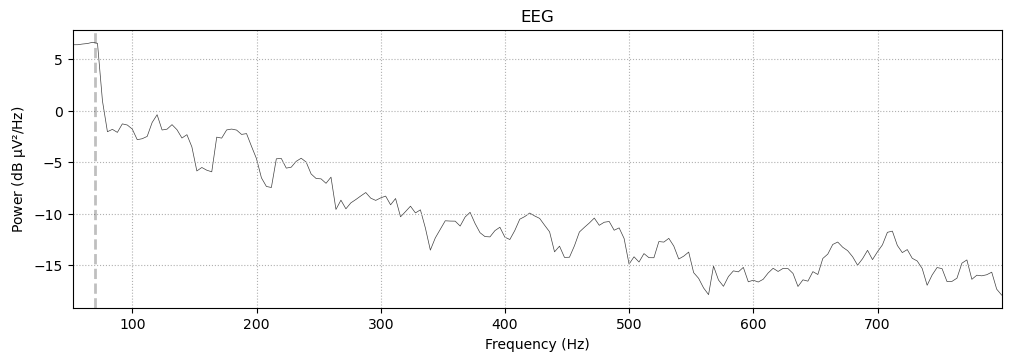

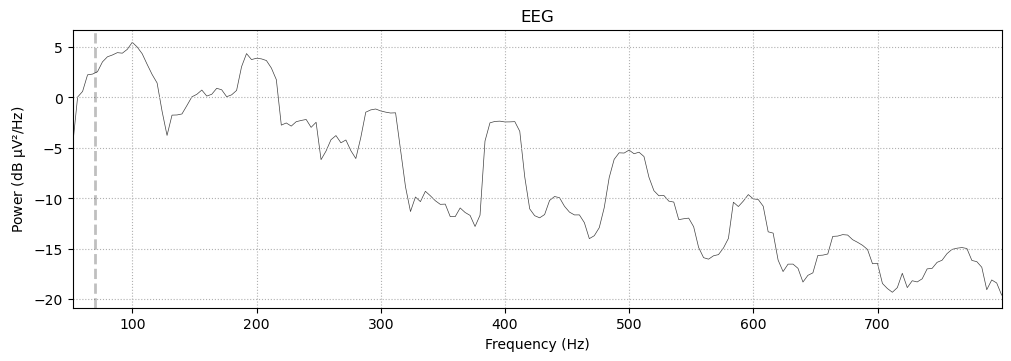

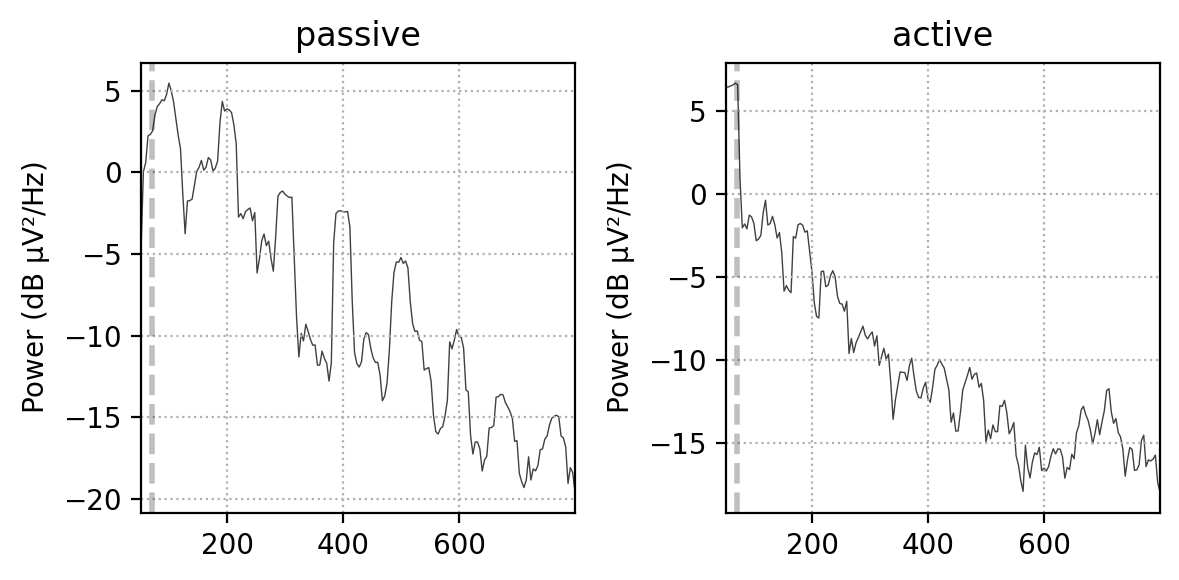

In [171]:
fig, ax = plt.subplots(1, 2, figsize=(6,3), dpi=200)
passive_psd.plot(axes=ax[0], show=False)
active_psd.plot(axes=ax[1], show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.tight_layout()
plt.show()

No baseline correction applied


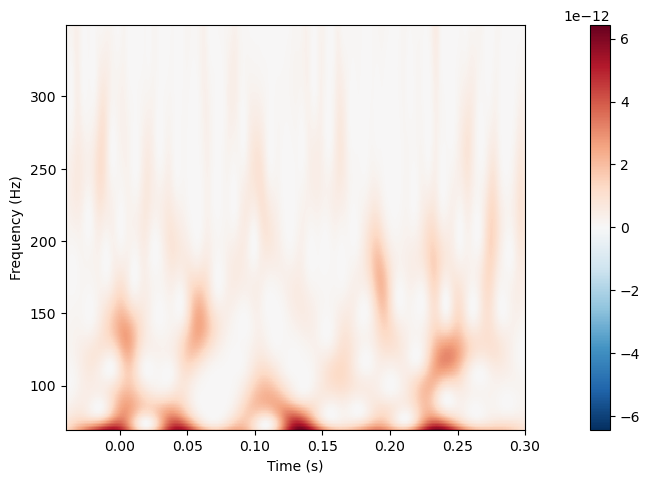

In [172]:
frequencies = np.arange(70,350)
active_power =  task_evoked_dict['active'].compute_tfr("morlet", freqs=frequencies)
active_power.plot();

No baseline correction applied


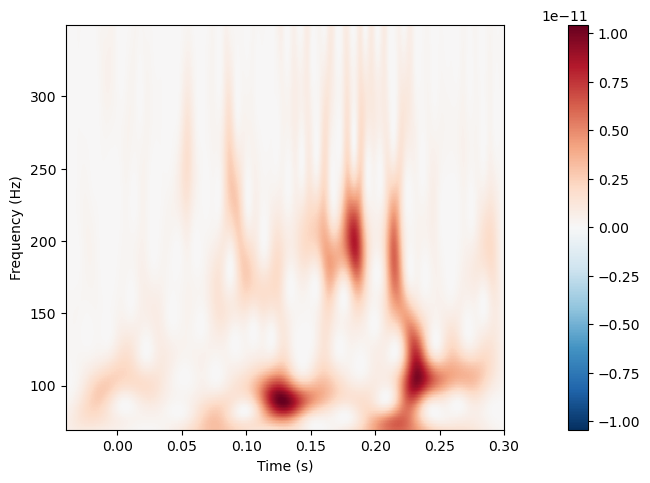

In [173]:
frequencies = np.arange(70,350)
passive_power =  task_evoked_dict['passive'].compute_tfr("morlet", freqs=frequencies)
passive_power.plot();

## Autocorrelation

In [174]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [175]:
acf, confint = sm.tsa.stattools.acf(all_evoked.data[0,:], 
                                    nlags=len(all_evoked.data[0,:])-1,
                                    alpha=.05)

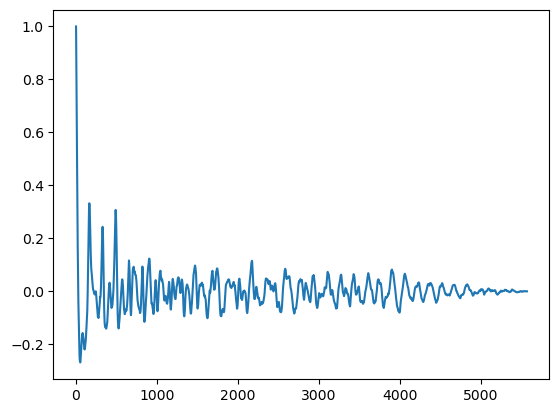

In [176]:
plt.plot(acf)
plt.show()

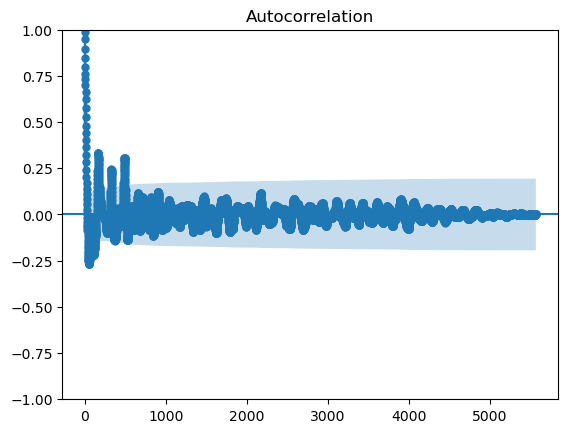

In [177]:
sm.graphics.tsa.plot_acf(all_evoked.data[0,:], 
                         lags=len(all_evoked.data[0,:])-1, 
                         zero=False,)

## Stimulus–response correlations


In [178]:
data.pick(['Erg1'])

Measurement date,"July 18, 2024 13:48:10 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,1 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,16384.00 Hz
Highpass,0.00 Hz
Lowpass,3334.00 Hz


In [159]:
# epoch data based on stimulus events
stim_epochs = mne.Epochs(data_filtered, 
                    events, 
                    event_id=event_dict,
                    picks=['Erg1'],
                    tmin=-0.04, tmax=0.3, 
                    baseline=[-0.04, 0],
                    #reject = dict(eeg = 35e-6)).drop_bad()
                    reject=dict(eeg=75)).drop_bad()

Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 5571 original time points ...
0 bad epochs dropped


In [182]:
stim_epochs

Number of events,1200
Events,pol_negative: 600pol_positive: 600
Time range,-0.040 – 0.300 s
Baseline,-0.040 – 0.000 s


In [183]:
stim_epochs.average()

Condition,0.50 × pol_positive + 0.50 × pol_negative
Data kind,average
Timepoints,5571 samples
Channels,1 channels
Number of averaged epochs,1200
Time range (secs),-0.03997802734375 – 0.29998779296875
Baseline (secs),-0.040 – 0.000 s


Need more than one channel to make topography for eeg. Disabling interactivity.


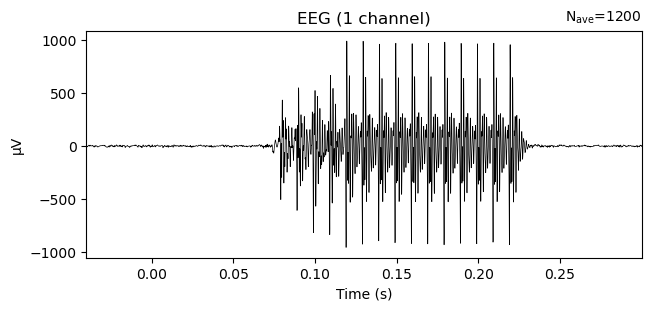

In [185]:
stim_epochs.average().plot();

In [194]:
stim_data = stim_epochs.average().get_data()[0,:]
active_data = task_evoked_dict['active'].get_data()[0,:]
passive_data = task_evoked_dict['passive'].get_data()[0,:]

In [198]:
from scipy.stats import spearmanr
active_res = spearmanr(active_data, stim_data, alternative='greater')
passive_res = spearmanr(passive_data, stim_data, alternative='greater')


In [199]:
active_res

SignificanceResult(statistic=-0.015754476895930125, pvalue=0.8801445228077406)

In [200]:
passive_res

SignificanceResult(statistic=0.012800000548565784, pvalue=0.1697368497443172)